In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy

# Open and preprocess data

In [2]:
wrime_df = pd.read_csv('/home/is/michaelsutant-v/emotion/wrime-ver1.tsv', sep='\t')
wrime_df["Reader3_Sadness"] = wrime_df["Reader3_Saddness"]
wrime_df["Reader2_Sadness"] = wrime_df["Reader2_Saddness"]

In [3]:
wrime_df.columns

Index(['Sentence', 'UserID', 'Datetime', 'Train/Dev/Test', 'Writer_Joy',
       'Writer_Sadness', 'Writer_Anticipation', 'Writer_Surprise',
       'Writer_Anger', 'Writer_Fear', 'Writer_Disgust', 'Writer_Trust',
       'Reader1_Joy', 'Reader1_Sadness', 'Reader1_Anticipation',
       'Reader1_Surprise', 'Reader1_Anger', 'Reader1_Fear', 'Reader1_Disgust',
       'Reader1_Trust', 'Reader2_Joy', 'Reader2_Saddness',
       'Reader2_Anticipation', 'Reader2_Surprise', 'Reader2_Anger',
       'Reader2_Fear', 'Reader2_Disgust', 'Reader2_Trust', 'Reader3_Joy',
       'Reader3_Saddness', 'Reader3_Anticipation', 'Reader3_Surprise',
       'Reader3_Anger', 'Reader3_Fear', 'Reader3_Disgust', 'Reader3_Trust',
       'Avg. Readers_Joy', 'Avg. Readers_Sadness', 'Avg. Readers_Anticipation',
       'Avg. Readers_Surprise', 'Avg. Readers_Anger', 'Avg. Readers_Fear',
       'Avg. Readers_Disgust', 'Avg. Readers_Trust', 'Reader3_Sadness',
       'Reader2_Sadness'],
      dtype='object')

In [4]:
def preprocess_df(dataframe):
  emotions = ["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]
  for emotion in emotions:
    dataframe[emotion] = (dataframe["Writer_"+emotion] + dataframe["Reader1_"+emotion] + dataframe["Reader2_"+emotion] + dataframe["Reader3_"+emotion])/4

  return dataframe[['Sentence']+emotions]

In [5]:
def preprocess_df_specified(dataframe, type):
  emotions = ["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]
  if type == "reader":
    for emotion in emotions:
      dataframe[emotion] = (dataframe["Reader1_"+emotion] + dataframe["Reader2_"+emotion] + dataframe["Reader3_"+emotion])/3
  elif type == "writer":
    for emotion in emotions:
      dataframe[emotion] = dataframe["Writer_"+emotion] 

  return dataframe[['Sentence']+emotions]

In [6]:
wrime_train_dat = wrime_df[wrime_df["Train/Dev/Test"] == "train"]
wrime_val_dat = wrime_df[wrime_df["Train/Dev/Test"] == "dev"]
wrime_test_dat = wrime_df[wrime_df["Train/Dev/Test"] == "test"]

In [7]:
wrime_train_data = preprocess_df(wrime_train_dat)
wrime_val_data = preprocess_df(wrime_val_dat)
wrime_test_data = preprocess_df(wrime_test_dat)
wrime_test_data_writer = preprocess_df_specified(wrime_test_dat, "writer")
wrime_test_data_reader = preprocess_df_specified(wrime_test_dat, "reader")

/tmp/ipykernel_2687087/1441221159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[emotion] = (dataframe["Writer_"+emotion] + dataframe["Reader1_"+emotion] + dataframe["Reader2_"+emotion] + dataframe["Reader3_"+emotion])/4
/tmp/ipykernel_2687087/1441221159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[emotion] = (dataframe["Writer_"+emotion] + dataframe["Reader1_"+emotion] + dataframe["Reader2_"+emotion] + dataframe["Reader3_"+emotion])/4
/tmp/ipykernel_2687087/1441221159.py:4: 

In [8]:
wrime_train_data[:1]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust
0,ぼけっとしてたらこんな時間｡チャリあるから食べにでたいのに…,0.0,1.75,0.5,0.5,0.25,0.25,0.25,0.25


In [9]:
wrime_val_data[:1]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust
21100,あの高音安定してだせん,0.0,1.5,0.0,0.5,0.0,0.0,0.25,0.0


In [10]:
wrime_test_data[:1]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust
24900,汗めっちゃかいた(),0.0,0.25,0.0,0.5,0.0,0.25,0.25,0.0


In [11]:
ser_test_data = pd.read_csv("/home/is/michaelsutant-v/emotion/4117_data.csv", header=None, names=["Sentence"])
ser_test_data[["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]] = 0
ser_test_data.head()

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust
0,六本木なう(*･ω･)ﾉwithスンちゃん、ちえ☆ [USER] [USER],0,0,0,0,0,0,0,0
1,[USER] 私初段からやばくてなっちゃんにのんでもらってた!!なっちゃんごめん大丈夫?まあ...,0,0,0,0,0,0,0,0
2,[USER] さん 僕のほぼメインのヨーヨーは フェノム プロト ジェネシス＋ LOOP9...,0,0,0,0,0,0,0,0
3,今から、娘と、みなとみらいホールへ、“楽器ものしりコンサート”に行きます。 久々に少しオシャ...,0,0,0,0,0,0,0,0
4,大塚ばりキモい(笑) 食い物ねだってくる(>_<) さすがでぶ,0,0,0,0,0,0,0,0


# Tokenizer

In [12]:
from transformers import AutoTokenizer
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

In [13]:
tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-v2")

def text_transform(text):
  return tokenizer(text, truncation=True, max_length=512)

text_transform("六本木なう(*･ω･)ﾉwithスンちゃん、ちえ☆ [USER] [USER] [PAD]")

{'input_ids': [2, 24470, 892, 6262, 22, 24, 1025, 330, 1025, 23, 984, 18829, 25161, 12148, 828, 883, 6426, 812, 73, 13557, 11804, 75, 73, 13557, 11804, 75, 0, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [14]:
tokenizer

PreTrainedTokenizer(name_or_path='cl-tohoku/bert-base-japanese-v2', vocab_size=32768, model_max_len=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

# Batch Collator

In [15]:
wrime_train_data.columns

Index(['Sentence', 'Joy', 'Sadness', 'Anticipation', 'Surprise', 'Anger',
       'Fear', 'Disgust', 'Trust'],
      dtype='object')

In [16]:
iter_train = [(row.Sentence, row.Joy, row.Sadness, row.Anticipation, row.Surprise, row.Anger, row.Fear, row.Disgust, row.Trust) for _, row in wrime_train_data.iterrows()]
iter_val = [(row.Sentence, row.Joy, row.Sadness, row.Anticipation, row.Surprise, row.Anger, row.Fear, row.Disgust, row.Trust) for _, row in wrime_val_data.iterrows()]
iter_test = [(row.Sentence, row.Joy, row.Sadness, row.Anticipation, row.Surprise, row.Anger, row.Fear, row.Disgust, row.Trust) for _, row in wrime_test_data.iterrows()]

iter_test_reader = [(row.Sentence, row.Joy, row.Sadness, row.Anticipation, row.Surprise, row.Anger, row.Fear, row.Disgust, row.Trust) for _, row in wrime_test_data_reader.iterrows()]
iter_test_writer = [(row.Sentence, row.Joy, row.Sadness, row.Anticipation, row.Surprise, row.Anger, row.Fear, row.Disgust, row.Trust) for _, row in wrime_test_data_writer.iterrows()]
iter_test_ser = [(row.Sentence, row.Joy, row.Sadness, row.Anticipation, row.Surprise, row.Anger, row.Fear, row.Disgust, row.Trust) for _, row in ser_test_data.iterrows()]

In [17]:
def collate_batch(batch):
  list_text = []
  list_attn_mask = []
  list_emotions = []

  for (text, joy, sadness, anticipation, surprise, anger, fear, disgust, trust,) in batch:
    transformed = text_transform(text)
    list_text.append(torch.tensor(transformed['input_ids']))
    list_attn_mask.append(torch.tensor(transformed['attention_mask']))

    list_emotions.append([torch.tensor(joy), torch.tensor(sadness), torch.tensor(anticipation),
      torch.tensor(surprise), torch.tensor(anger), torch.tensor(fear), torch.tensor(disgust), torch.tensor(trust)
    ])

  padded_id = pad_sequence(list_text, padding_value = 0).t()
  padded_attn_mask = pad_sequence(list_attn_mask, padding_value = 0).t()

  return padded_id.contiguous(), padded_attn_mask.contiguous(), torch.FloatTensor(list_emotions).contiguous()#torch.FloatTensor(list_joy).contiguous(), torch.FloatTensor(list_sadness).contiguous(), torch.FloatTensor(list_anticipation).contiguous(), torch.FloatTensor(list_surprise).contiguous(), torch.FloatTensor(list_anger).contiguous(), torch.FloatTensor(list_fear).contiguous(), torch.FloatTensor(list_disgust).contiguous(), torch.FloatTensor(list_trust).contiguous()


In [18]:
train_dataloader = DataLoader(iter_train, batch_size = 16, shuffle = False, collate_fn = collate_batch)
a,b, c= next(iter(train_dataloader))

# Data Loader

In [19]:
def load_data(
  iterList,
  batch_size,
  collate_fn,
  pin_memory,
  num_workers
):
  return DataLoader(iterList, collate_fn = collate_batch, batch_size = batch_size, pin_memory = pin_memory, num_workers = num_workers)

bucketTrain = load_data(iter_train[:], 64, collate_batch, True, 2) 
bucketVal = load_data(iter_val[:], 64, collate_batch, True, 2)
bucketTest = load_data(iter_test[:], 64, collate_batch, True, 2) 
bucketTest_writer = load_data(iter_test_writer[:], 64, collate_batch, True, 2) 
bucketTest_reader = load_data(iter_test_reader[:], 64, collate_batch, True, 2) 
bucketTest_ser = load_data(iter_test_ser[:], 64, collate_batch, True, 2) 

# Model


In [20]:
from transformers import AutoModelForSequenceClassification
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
from pytorch_lightning import seed_everything
from transformers import get_cosine_schedule_with_warmup

seed_everything(42, workers=True)

Global seed set to 42


42

In [21]:
class BertRegressor(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.bert = AutoModelForSequenceClassification.from_pretrained("cl-tohoku/bert-base-japanese-v2", num_labels = 8, problem_type = "regression")
    self.relu = torch.nn.ReLU()
  def forward(self, text, attn_mask):
    return self.relu(self.bert(text, attn_mask).logits)


# Trainer

In [22]:
class PlTransformer(pl.LightningModule):
  def __init__(self, model, lr):
    super().__init__()
    self.model = model
    self.lr = lr
    self.mse = torch.nn.MSELoss()

  
  def training_step(self, batch, batch_idx): 
    sentence = batch[0]
    attn_mask = batch[1]
    emotion = batch[2]

    # predicted distribution
    logits = self.model(sentence, attn_mask)
    loss = self.mse(logits, emotion)
    self.log('training_loss', loss, on_step=True, on_epoch=True)
    return loss

  def validation_step(self, batch, batch_idx):
    sentence = batch[0]
    attn_mask = batch[1]
    emotion = batch[2]

    # predicted distribution
    logits = self.model(sentence, attn_mask)
    loss = self.mse(logits, emotion)

    loss_joy = self.mse(logits, emotion)
    self.log('validation_loss', loss, on_step=True, on_epoch=True)
    return loss

  def test_step(self, batch, batch_idx):
    sentence = batch[0]
    attn_mask = batch[1]
    emotion = batch[2]

    # predicted distribution
    logits = self.model(sentence, attn_mask)
    loss_joy = self.mse(logits[:,0], emotion[:,0])
    loss_sadness = self.mse(logits[:,1], emotion[:,1])
    loss_anticipation = self.mse(logits[:,2], emotion[:,2])
    loss_surprise = self.mse(logits[:,3], emotion[:,3])
    loss_anger = self.mse(logits[:,4], emotion[:,4])
    loss_fear = self.mse(logits[:,5], emotion[:,5])
    loss_disgust = self.mse(logits[:,6], emotion[:,6])
    loss_trust = self.mse(logits[:,7], emotion[:,7])
    loss = self.mse(logits[:,:], emotion[:,:])

    self.log('test_loss', loss, on_step=True, on_epoch=True)
    self.log('joy', loss_joy, on_step=True, on_epoch=True)
    self.log('sadness', loss_sadness, on_step=True, on_epoch=True)
    self.log('anticipation', loss_anticipation, on_step=True, on_epoch=True)
    self.log('surprise', loss_surprise, on_step=True, on_epoch=True)
    self.log('anger', loss_anger, on_step=True, on_epoch=True)
    self.log('fear', loss_fear, on_step=True, on_epoch=True)
    self.log('disgust', loss_disgust, on_step=True, on_epoch=True)
    self.log('trust', loss_trust, on_step=True, on_epoch=True)
    return loss

  def predict_step(self, batch, batch_idx):
    sentence = batch[0]
    attn_mask = batch[1]
    emotion = batch[2]
    # predicted distribution
    logits = self.model(sentence, attn_mask)
    return logits, emotion


  def configure_optimizers(self):
    optimizer = optim.Adam(list(self.model.parameters()), lr=self.lr, betas=(0.9, 0.98), eps=1e-9)    
    scheduler = get_cosine_schedule_with_warmup(
      optimizer,
      num_warmup_steps=1000,
      num_training_steps= 7825
      )

    scheduler = {"scheduler": scheduler, "interval": "step", "frequency": 1, 'monitor':"val_loss"}
    return [optimizer], [scheduler]



# Train

In [23]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.strategies import DDPStrategy

In [24]:
bertRegressor = BertRegressor()
regressor = PlTransformer(bertRegressor, 0.0001)

checkpoint_callback = ModelCheckpoint(
  dirpath="/cl/work/michaelsutant-v/", 
  filename='Sociocom-{epoch:02d}-{validation_loss:.2f}',
  save_top_k=2, monitor="validation_loss", mode="min",
  save_last=True
  )

logger = TensorBoardLogger("lightning_logs", name="Sociocom")

lrmonitor = LearningRateMonitor(logging_interval='step')

trainer = pl.Trainer(
  accelerator="gpu", 
  devices=[0], 
  strategy="dp",#DDPStrategy(find_unused_parameters=False), 
  max_epochs = 25,
  #max_steps = 1,
  gradient_clip_val=0.5,
  detect_anomaly = True,
  enable_progress_bar = True,
  callbacks=[checkpoint_callback, lrmonitor],
  logger=logger
  )

# trainer.fit(
#   model = regressor, 
#   train_dataloaders = bucketTrain, 
#   val_dataloaders = bucketVal
#   )


Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-v2 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

# Test

In [28]:
trainer.test(
  regressor, 
  dataloaders=bucketTest, 
  ckpt_path="/cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt")


Restoring states from the checkpoint path at /cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from checkpoint at /cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt
/home/is/michaelsutant-v/mambaforge/envs/kenkyuu-env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       anger_epoch          0.06395675987005234
   anticipation_epoch       0.20635181665420532
      disgust_epoch         0.1472771167755127
       fear_epoch           0.1382714956998825
        joy_epoch           0.1900036334991455
      sadness_epoch         0.17472843825817108
     surprise_epoch         0.1370452344417572
     test_loss_epoch        0.13844896852970123
       trust_epoch          0.04995723068714142
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss_epoch': 0.13844896852970123,
  'joy_epoch': 0.1900036334991455,
  'sadness_epoch': 0.17472843825817108,
  'anticipation_epoch': 0.20635181665420532,
  'surprise_epoch': 0.1370452344417572,
  'anger_epoch': 0.06395675987005234,
  'fear_epoch': 0.1382714956998825,
  'disgust_epoch': 0.1472771167755127,
  'trust_epoch': 0.04995723068714142}]

In [27]:
trainer.test(
  regressor, 
  dataloaders=bucketTest_writer, 
  ckpt_path="/cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt")


Restoring states from the checkpoint path at /cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from checkpoint at /cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt
/home/is/michaelsutant-v/mambaforge/envs/kenkyuu-env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       anger_epoch          0.6129358410835266
   anticipation_epoch       0.8091835379600525
      disgust_epoch         0.7010751366615295
       fear_epoch           0.46789172291755676
        joy_epoch           0.6143090128898621
      sadness_epoch         0.7063494324684143
     surprise_epoch         0.4817790389060974
     test_loss_epoch        0.5907737016677856
       trust_epoch          0.33266615867614746
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss_epoch': 0.5907737016677856,
  'joy_epoch': 0.6143090128898621,
  'sadness_epoch': 0.7063494324684143,
  'anticipation_epoch': 0.8091835379600525,
  'surprise_epoch': 0.4817790389060974,
  'anger_epoch': 0.6129358410835266,
  'fear_epoch': 0.46789172291755676,
  'disgust_epoch': 0.7010751366615295,
  'trust_epoch': 0.33266615867614746}]

In [26]:
trainer.test(
  regressor, 
  dataloaders=bucketTest_reader, 
  ckpt_path="/cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt")


Restoring states from the checkpoint path at /cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from checkpoint at /cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt
/home/is/michaelsutant-v/mambaforge/envs/kenkyuu-env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       anger_epoch          0.03681096062064171
   anticipation_epoch       0.20911626517772675
      disgust_epoch         0.12174725532531738
       fear_epoch           0.14377303421497345
        joy_epoch           0.20431844890117645
      sadness_epoch         0.18582704663276672
     surprise_epoch         0.1514117419719696
     test_loss_epoch        0.13693620264530182
       trust_epoch          0.04248480498790741
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss_epoch': 0.13693620264530182,
  'joy_epoch': 0.20431844890117645,
  'sadness_epoch': 0.18582704663276672,
  'anticipation_epoch': 0.20911626517772675,
  'surprise_epoch': 0.1514117419719696,
  'anger_epoch': 0.03681096062064171,
  'fear_epoch': 0.14377303421497345,
  'disgust_epoch': 0.12174725532531738,
  'trust_epoch': 0.04248480498790741}]

# Inference

In [29]:
predictions = trainer.predict(
  regressor, 
  dataloaders=bucketTest_ser, 
  ckpt_path="/cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt")


Restoring states from the checkpoint path at /cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from checkpoint at /cl/work/michaelsutant-v/Sociocom-epoch=43-validation_loss=0.13.ckpt
/home/is/michaelsutant-v/mambaforge/envs/kenkyuu-env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

In [30]:
pred = []
gold = []

for batch in predictions:
  for pr in batch[0]:
    pred.append(pr.tolist())
  for go in batch[1]:
    gold.append(go.tolist())


In [31]:
df_ = pd.DataFrame(pred)["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]

In [32]:
ser_test_data[["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]] = df_

In [33]:
ser_test_data.head()

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust
0,六本木なう(*･ω･)ﾉwithスンちゃん、ちえ☆ [USER] [USER],1.669096,0.000000,0.319300,0.017175,0.000000,0.000000,0.000000,0.260731
1,[USER] 私初段からやばくてなっちゃんにのんでもらってた!!なっちゃんごめん大丈夫?まあ...,2.167289,0.092997,0.767829,1.085469,0.000000,0.724342,0.000000,0.653466
2,[USER] さん 僕のほぼメインのヨーヨーは フェノム プロト ジェネシス＋ LOOP9...,0.000000,0.000000,0.778604,0.354175,0.000000,0.000000,0.000000,0.016566
3,今から、娘と、みなとみらいホールへ、“楽器ものしりコンサート”に行きます。 久々に少しオシャ...,1.236407,1.239154,0.750671,0.000000,0.000000,0.000000,0.252978,0.167677
4,大塚ばりキモい(笑) 食い物ねだってくる(>_<) さすがでぶ,0.195181,0.306286,0.000000,0.580636,0.046881,0.658243,1.459436,0.134785


In [141]:
#ser_test_data.to_csv("extracted_emotion.csv", index=False)
ser_test_data = pd.read_csv("extracted_emotion.csv")
ser_test_data.head()

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust
0,六本木なう(*･ω･)ﾉwithスンちゃん、ちえ☆ [USER] [USER],1.669096,0.000000,0.319300,0.017175,0.000000,0.000000,0.000000,0.260731
1,[USER] 私初段からやばくてなっちゃんにのんでもらってた!!なっちゃんごめん大丈夫?まあ...,2.167289,0.092997,0.767829,1.085469,0.000000,0.724342,0.000000,0.653466
2,[USER] さん 僕のほぼメインのヨーヨーは フェノム プロト ジェネシス＋ LOOP9...,0.000000,0.000000,0.778604,0.354175,0.000000,0.000000,0.000000,0.016566
3,今から、娘と、みなとみらいホールへ、“楽器ものしりコンサート”に行きます。 久々に少しオシャ...,1.236407,1.239154,0.750671,0.000000,0.000000,0.000000,0.252978,0.167677
4,大塚ばりキモい(笑) 食い物ねだってくる(>_<) さすがでぶ,0.195181,0.306286,0.000000,0.580636,0.046881,0.658243,1.459436,0.134785


<AxesSubplot:>

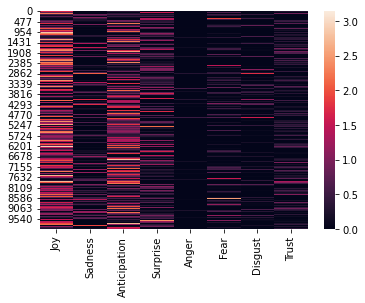

In [142]:
sns.heatmap(data = ser_test_data[["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]])

In [143]:
import umap
import umap.plot

In [147]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
col = ["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]

normalised_feature = ser_test_data
normalised_feature[col] = scaler.fit_transform(normalised_feature[col])

normalised_feature.head()

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust
0,六本木なう(*･ω･)ﾉwithスンちゃん、ちえ☆ [USER] [USER],0.532120,0.000000,0.108762,0.005824,0.000000,0.000000,0.000000,0.127040
1,[USER] 私初段からやばくてなっちゃんにのんでもらってた!!なっちゃんごめん大丈夫?まあ...,0.690948,0.030742,0.261542,0.368067,0.000000,0.232350,0.000000,0.318398
2,[USER] さん 僕のほぼメインのヨーヨーは フェノム プロト ジェネシス＋ LOOP9...,0.000000,0.000000,0.265212,0.120096,0.000000,0.000000,0.000000,0.008071
3,今から、娘と、みなとみらいホールへ、“楽器ものしりコンサート”に行きます。 久々に少しオシャ...,0.394176,0.409632,0.255697,0.000000,0.000000,0.000000,0.092159,0.081700
4,大塚ばりキモい(笑) 食い物ねだってくる(>_<) さすがでぶ,0.062225,0.101250,0.000000,0.196885,0.017841,0.211147,0.531670,0.065673


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

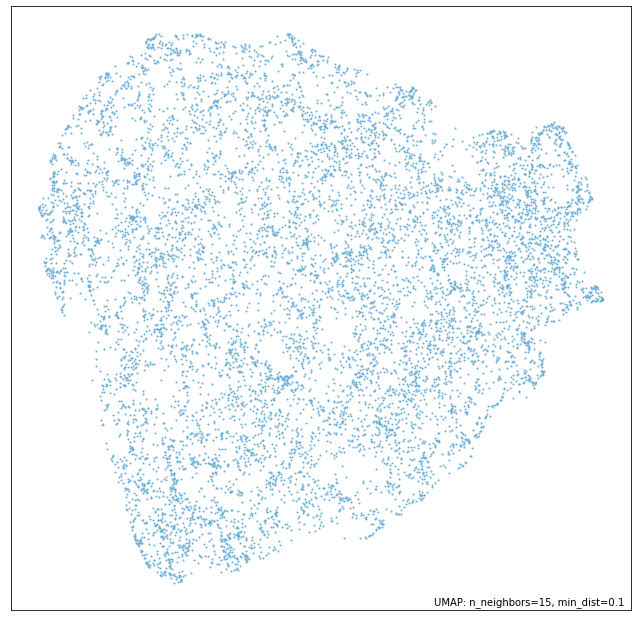

In [162]:
mapper = umap.UMAP().fit(normalised_feature[col])
umap.plot.points(mapper)


# Clustering with KMeans
### this to show that KMeans wont work with this data

In [146]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

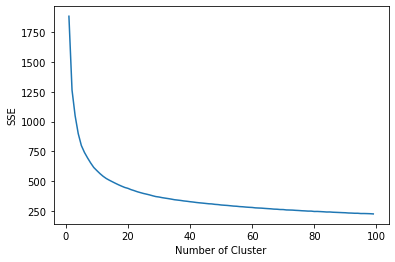

In [148]:
sse = {}
for k in range(1, 100):
    kmeans = KMeans(n_clusters=k, max_iter=300).fit(normalised_feature[col])
    normalised_feature["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()


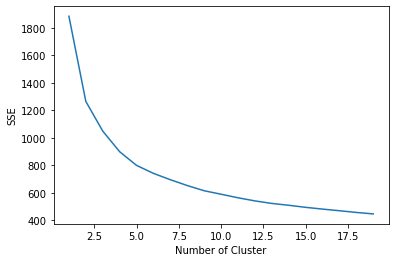

In [149]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=300).fit(normalised_feature[col])
    normalised_feature["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()


In [150]:
from sklearn.decomposition import PCA
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [151]:
feat = normalised_feature[col]

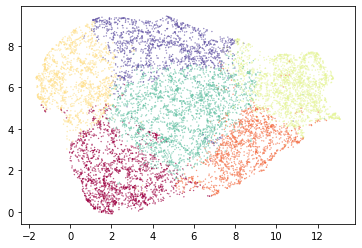

In [152]:
kmeans = KMeans(n_clusters=6, max_iter=300).fit(normalised_feature[col])
standard_embedding = umap.UMAP(random_state=42).fit_transform(feat)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans.labels_, s=0.1, cmap='Spectral');

# Clustering with DBSCAN
### switching to density-based

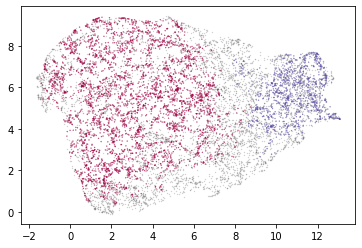

In [153]:
lowd_mnist = PCA(n_components=4).fit_transform(feat)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(lowd_mnist)
clustered = (hdbscan_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1,
            cmap='Spectral');

In [154]:
print("coverage: ",(len(feat)-np.count_nonzero(hdbscan_labels == -1))/len(feat),"%")

coverage:  0.4751 %


# Clustering with PCA+DBSCAN (from umap documentation)

In [155]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(feat)

In [156]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

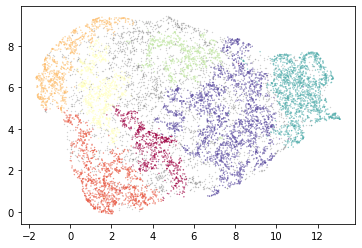

In [184]:
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');


In [158]:
print("coverage: ",(len(feat)-np.count_nonzero(labels == -1))/len(feat),"%")

coverage:  0.7542 %


In [159]:
ser_test_data["clusters"] = labels
ser_test_data.head()

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust,clusters
0,六本木なう(*･ω･)ﾉwithスンちゃん、ちえ☆ [USER] [USER],0.532120,0.000000,0.108762,0.005824,0.000000,0.000000,0.000000,0.127040,1
1,[USER] 私初段からやばくてなっちゃんにのんでもらってた!!なっちゃんごめん大丈夫?まあ...,0.690948,0.030742,0.261542,0.368067,0.000000,0.232350,0.000000,0.318398,1
2,[USER] さん 僕のほぼメインのヨーヨーは フェノム プロト ジェネシス＋ LOOP9...,0.000000,0.000000,0.265212,0.120096,0.000000,0.000000,0.000000,0.008071,6
3,今から、娘と、みなとみらいホールへ、“楽器ものしりコンサート”に行きます。 久々に少しオシャ...,0.394176,0.409632,0.255697,0.000000,0.000000,0.000000,0.092159,0.081700,6
4,大塚ばりキモい(笑) 食い物ねだってくる(>_<) さすがでぶ,0.062225,0.101250,0.000000,0.196885,0.017841,0.211147,0.531670,0.065673,5


# Clusters Explanation

In [163]:
#ser_test_data.to_csv("extracted_emotion_labeled.csv", index=False)
ser_test_data = pd.read_csv("extracted_emotion_labeled.csv")

# 1st cluster

In [169]:
ser_test_data[ser_test_data["clusters"] == 1]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust,clusters
0,六本木なう(*･ω･)ﾉwithスンちゃん、ちえ☆ [USER] [USER],0.532120,0.000000,0.108762,0.005824,0.000000,0.000000,0.000000,0.127040,1
1,[USER] 私初段からやばくてなっちゃんにのんでもらってた!!なっちゃんごめん大丈夫?まあ...,0.690948,0.030742,0.261542,0.368067,0.000000,0.232350,0.000000,0.318398,1
22,昨日はモーニング娘。の福岡コンサート行ってきました＼(^o^)／めっちゃ盛り上がった！やっぱ...,0.854482,0.000000,0.219840,0.250166,0.000000,0.000000,0.000000,0.482463,1
40,捕まってよかった!! 脱走の男確保 逃走容疑で逮捕 #yjfc_hiroshima_pr...,0.652970,0.030313,0.114024,0.142818,0.123081,0.010599,0.060103,0.000000,1
41,[USER] お肌つやつや…感動した！肌弱いから心配してたんだけどすごくいいコンディショナー...,0.694672,0.013733,0.099903,0.360497,0.000000,0.000000,0.000000,0.235753,1
...,...,...,...,...,...,...,...,...,...,...
9937,[USER] いいねぇ(*^^*) いいなぁ、いいなぁ(￣▽￣;),0.635819,0.000000,0.167558,0.058486,0.000000,0.000000,0.000000,0.189168,1
9949,[USER] えーいーなぁ！！シャーロットの旦那やりよるなww,0.632783,0.000000,0.212497,0.366578,0.000000,0.000000,0.000000,0.268414,1
9956,[USER] 女と男だよ！誕生日ぱーちーしてもらった（） めいにが味噌くるとかしあわせすぎるうう,0.831714,0.000000,0.013270,0.236341,0.000000,0.000000,0.000000,0.084009,1
9984,Twitter初めてです だから適当につぶやきまくます この前地方番組 「このへんトラ...,0.644561,0.000000,0.275439,0.239190,0.000000,0.000000,0.000000,0.238118,1


<AxesSubplot:>

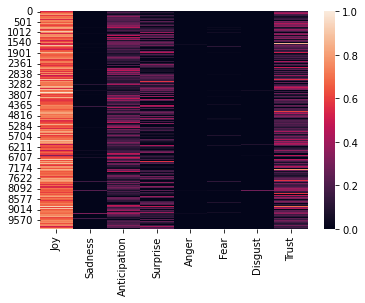

In [168]:
sns.heatmap(data = ser_test_data[ser_test_data["clusters"] == 1][["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]])

## 2nd cluster

In [170]:
ser_test_data[ser_test_data["clusters"] == 2]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust,clusters
7,[USER] おおおぉぉ‼ご近所♪( ´▽｀) よろしく〜( ´ ▽ ` )ﾉ ヨークベニマ...,0.758161,0.0,0.545295,0.021952,0.0,0.0,0.000000,0.275895,2
26,[USER] 参加するからには生にもチャレンジして頂きましょうよ！,0.221686,0.0,0.795756,0.000000,0.0,0.0,0.000000,0.130045,2
33,[USER] 返信ありがとうございます(^^)仙台まで行ってきます。行きは高速バスで、帰りは...,0.643843,0.0,0.700479,0.000000,0.0,0.0,0.000000,0.174612,2
52,[USER] 寝る前にもっかい。現在参加してくださるゲストを募集中です。ふるって(主にペンタ...,0.322479,0.0,0.882528,0.000000,0.0,0.0,0.000000,0.220063,2
54,サイエンスカフェ「音を創る」はじまりました！ #ypcafe [URL] [URL],0.524559,0.0,0.623351,0.021382,0.0,0.0,0.000000,0.111985,2
...,...,...,...,...,...,...,...,...,...,...
9955,別府まで乗せてくれたトラック運転手の方は宇佐神宮や別府の観光名所など色々案内してくれました。...,0.484963,0.0,0.700653,0.146365,0.0,0.0,0.004539,0.239835,2
9958,今から塾に行ってきまーす(^O^)／ 帰りは7時か10時かなww？ 帰ったらツイートします！...,0.609633,0.0,0.811626,0.000000,0.0,0.0,0.000000,0.054460,2
9965,[USER] とにかく、がんばることが、一番大切(^O^)／ ガンバレ(^O^)／,0.466307,0.0,0.579917,0.000000,0.0,0.0,0.000000,0.402581,2
9988,今日は金曜日！！ 博多デイトス「焼鳥司」はたくさんのお客さんを今日もお待ちしておりますm(_...,0.538525,0.0,0.671668,0.000000,0.0,0.0,0.000000,0.296947,2


<AxesSubplot:>

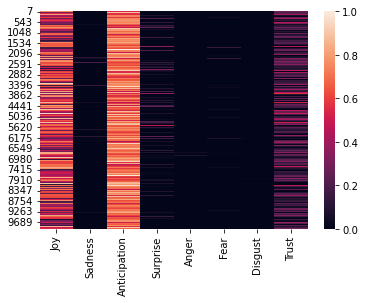

In [171]:
sns.heatmap(data = ser_test_data[ser_test_data["clusters"] == 2][["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]])

# 3rd cluster

In [172]:
ser_test_data[ser_test_data["clusters"] == 3]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust,clusters
25,美味しき鶏肉が食べたくてドライブがてら買いにきちゃった。ここのはとっても美味しい！さて、渋滞...,0.411159,0.000000,0.572777,0.000000,0.000000,0.000000,0.000000,0.000000,3
27,イーストンズの舞台面白がったです。 千秋楽の日にはまだ若干席が空いているそうなのでお時間のあ...,0.423925,0.002206,0.610740,0.000000,0.000000,0.000000,0.000000,0.036799,3
63,明日は午前午後とフットサル(o^^o) 足の爪ヤバイー＼(^o^)／,0.552720,0.000000,0.343368,0.008894,0.000000,0.141644,0.000000,0.000000,3
65,[USER] COSMOのお兄さんみたいやった俺？？漬け物頑張ります！ちなみに今日お渡しした...,0.353016,0.000000,0.503787,0.173638,0.000000,0.000000,0.000000,0.033824,3
81,[USER] それはそうとうだぞ笑 かなり豪華やな～ あたしも三月一人旅いかねば！ かえって...,0.408741,0.000000,0.561344,0.277108,0.000000,0.000000,0.000000,0.039820,3
...,...,...,...,...,...,...,...,...,...,...
9944,ソフトバン～クホぉークス！ やるんだっ！www [URL] [URL],0.396434,0.000000,0.404449,0.237657,0.005103,0.000000,0.000000,0.043824,3
9945,ある本にスキンケアも食べ物に使うオイルを使ってするといいって書いてあった。クレンジングも普通...,0.332002,0.130909,0.568424,0.339298,0.000000,0.058740,0.124203,0.289680,3
9954,４月４日(水)☆ #瑞竜小学校 の #桜2012 #瑞桜 #常陸太田 #osanpo_cl...,0.508560,0.000000,0.362182,0.000000,0.000000,0.000000,0.000000,0.000000,3
9976,今日はバンジャビカレー(^-^)/美味しそう〜 #マサラデリー [URL],0.483369,0.000000,0.474564,0.000000,0.000000,0.000000,0.000000,0.000000,3


<AxesSubplot:>

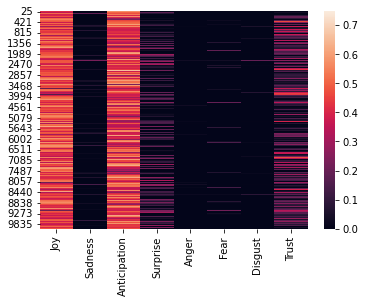

In [173]:
sns.heatmap(data = ser_test_data[ser_test_data["clusters"] == 3][["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]])

# 4th cluster

In [174]:
ser_test_data[ser_test_data["clusters"] == 4]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust,clusters
9,韓流ブームって何ですか？ どこで起きてるのですか？ ふと新大久保で考えてみた。,0.000000,0.000000,0.310719,0.155537,0.000000,0.048314,0.000000,0.000000,4
23,今夜は酒無しだからここに決めた(￣0￣)俺のジャンヌじゃないけど...... [URL],0.164367,0.052701,0.325235,0.000000,0.000000,0.070804,0.035983,0.039933,4
34,[USER] ってか、ろっきゅうおにぎりはどこにあるのかしら(笑),0.023434,0.011212,0.319745,0.203794,0.000000,0.017550,0.000000,0.000000,4
51,ALINCO フット・バブ ライト MCR4000... [URL],0.040910,0.000000,0.320457,0.018331,0.000000,0.000000,0.000000,0.000000,4
68,そろそろ寝ぐらを見つけたい…正直箱根のダメージが深刻なんでホテルでもあればいいんだが…,0.000000,0.141875,0.352012,0.000000,0.000000,0.294677,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...,...
9960,富士山のてっぺんってヒートテックだけでいけるかしら？( ´ ▽ ` ),0.000000,0.056919,0.383933,0.140437,0.000000,0.039006,0.000000,0.008646,4
9979,来週はスキー講習会参加。ロボコンのオフが活動期。とは言え年間のペース配分を考えて実のある行動...,0.095125,0.000000,0.392759,0.001434,0.017782,0.170969,0.034222,0.049236,4
9980,[USER] アスタムランド頑張って下さい。昨日、黒米サンプル送りました。,0.096529,0.039824,0.495599,0.000000,0.000000,0.000000,0.000000,0.173410,4
9982,[USER] 大変だんだね。責任感がいう人は何でもしちゃうし大変!自分がやりたいようにするた...,0.095682,0.078255,0.485163,0.173769,0.000000,0.295130,0.000000,0.156318,4


<AxesSubplot:>

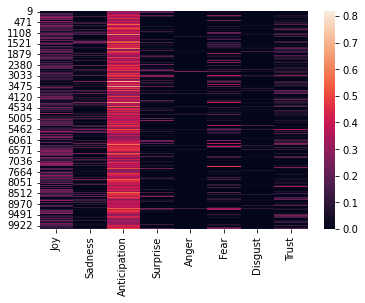

In [175]:
sns.heatmap(data = ser_test_data[ser_test_data["clusters"] == 4][["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]])

# 5th cluster

In [176]:
ser_test_data[ser_test_data["clusters"] == 5]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust,clusters
4,大塚ばりキモい(笑) 食い物ねだってくる(>_<) さすがでぶ,0.062225,0.101250,0.000000,0.196885,0.017841,0.211147,0.531670,0.065673,5
13,寒い中こごえながらワックスしなければならんとしたら多分ワックスしないと思うブ━━━━∵;（;...,0.000000,0.138706,0.086882,0.202148,0.221089,0.240548,0.289061,0.000000,5
15,レーティング差2で301で60点とクリケットブル以外オール1マークはキツイよ(´;ω;`),0.000000,0.534861,0.000000,0.114666,0.000000,0.032764,0.104066,0.000000,5
17,[USER] 原発はもういりません だって電力たりてんじゃん！ 東電の努力と国民の節電での成...,0.000000,0.073949,0.254432,0.138338,0.127904,0.092169,0.313446,0.000000,5
18,ヤバス！スマホのアプリをDLしたは良いけど、使いこなせてねぇ！！twitrerも使用方法分か...,0.125188,0.463389,0.115703,0.122402,0.000000,0.071080,0.051013,0.104273,5
...,...,...,...,...,...,...,...,...,...,...
9977,仕事おわったなう。久しぶりに0時オーバー。。。もう、ホントに、この仕事ツライ。お給料は少なく...,0.006917,0.721263,0.085256,0.000000,0.128680,0.228306,0.616645,0.000000,5
9978,最近、日本語が相当難しくなってきた。物理や化学のせいだ。もう勉強しないくらい疲れた。それに加...,0.000000,0.470023,0.000000,0.235228,0.066255,0.236887,0.090994,0.053926,5
9986,電車の中で小学生女子のイジメを目撃なう。結構タチ悪いよー。あんな子どもには育てたくないわ＼(...,0.024006,0.159729,0.000000,0.075063,0.021537,0.213452,0.747733,0.000000,5
9989,最近酒浸りや…([USER] 酒浸りになりたい時は自己破壊欲があるんですって！,0.029725,0.185138,0.084812,0.032399,0.000000,0.118953,0.264993,0.015795,5


<AxesSubplot:>

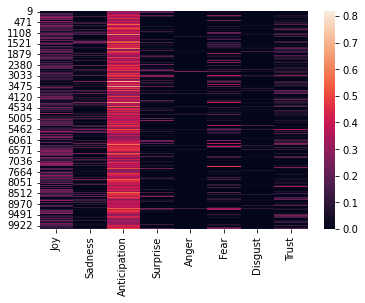

In [177]:
sns.heatmap(data = ser_test_data[ser_test_data["clusters"] == 4][["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]])

# 6th cluster

In [178]:
ser_test_data[ser_test_data["clusters"] == 6]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust,clusters
2,[USER] さん 僕のほぼメインのヨーヨーは フェノム プロト ジェネシス＋ LOOP9...,0.000000,0.000000,0.265212,0.120096,0.000000,0.000000,0.000000,0.008071,6
3,今から、娘と、みなとみらいホールへ、“楽器ものしりコンサート”に行きます。 久々に少しオシャ...,0.394176,0.409632,0.255697,0.000000,0.000000,0.000000,0.092159,0.081700,6
6,busy？ or not busy？ I could not understand toda...,0.005016,0.174549,0.093167,0.033982,0.025463,0.000000,0.025735,0.000000,6
8,今日の収穫：珍宝島が実在して、その領有権をめぐって、中ソ間で武力衝突があったということを知った。,0.082165,0.000000,0.000000,0.542533,0.000000,0.108293,0.000000,0.077635,6
10,居酒屋なう。 特製サラダたのんだら、予想外のがきた‼‼‼‼ う、う、 うどん？(((;꒪ꈊ꒪...,0.338583,0.235618,0.120814,0.488781,0.000000,0.076661,0.130804,0.000000,6
...,...,...,...,...,...,...,...,...,...,...
9973,この眼鏡の時は寛ぎモードなのだ。 @ PENNY LANE 鶴田店 [URL],0.148971,0.000000,0.188750,0.058369,0.000000,0.000000,0.000000,0.054645,6
9975,[USER] 僕も昔それやった事ある！ 「ごめんなさい！財布とって来ます」って言って家から財...,0.293610,0.030848,0.136427,0.223677,0.000000,0.000000,0.000000,0.000000,6
9983,終電乗って椅子に座って落ちついてたら、モロやんが電車のドアに目の前で挟まれてた♪( ´▽｀),0.350961,0.255968,0.024734,0.383613,0.000000,0.051900,0.069844,0.034542,6
9990,[USER] もしかして俺たちの見ていたiganuは幻だったのか…？,0.000000,0.163665,0.006266,0.338401,0.000000,0.088194,0.000000,0.038666,6


<AxesSubplot:>

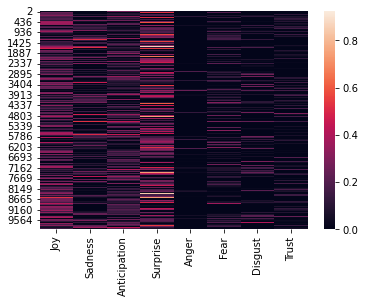

In [179]:
sns.heatmap(data = ser_test_data[ser_test_data["clusters"] == 6][["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]])

# 7th cluster

In [181]:
ser_test_data[ser_test_data["clusters"] == 0]

,Sentence,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust,clusters
5,[USER] 10件目から帰署(；´Д`A忙しいバイ♪(´ε｀ ),0.335072,0.059857,0.000000,0.000969,0.0,0.108946,0.000000,0.045792,0
21,[USER] おはようございます。あと200km ぐらいです。かたいたまー！,0.395609,0.000000,0.213553,0.034576,0.0,0.000000,0.000000,0.161644,0
44,神様からdadagouに突然メールが来た。 本文：「今からちょっと天界デートしない？」 [U...,0.409770,0.000000,0.335884,0.307282,0.0,0.000000,0.000000,0.114081,0
85,[USER] げろかわなんだよなちゃん\(//∇//)\にやにや,0.512598,0.000000,0.128025,0.172936,0.0,0.000000,0.000000,0.228358,0
95,心地好い忙しさが舞い込んできてる♪ やっぱ暇よりは忙しいのが好きな貧乏性な私┐(´∀｀)┌ﾔﾚﾔﾚ,0.403187,0.179600,0.078456,0.000000,0.0,0.047187,0.136946,0.052142,0
...,...,...,...,...,...,...,...,...,...,...
9865,松島から仙台に移動。 旅の締めくくりにまったりしたなぁ [URL],0.414436,0.000000,0.188356,0.000000,0.0,0.000000,0.000000,0.126089,0
9888,[USER] チャンちゃん、絵じょうずなんだ～(´,0.366298,0.000000,0.040576,0.305556,0.0,0.000000,0.000000,0.138791,0
9897,[USER] いえ、帰ってリビングでそのまま寝てしまったんですが冷房がガンガンにかかっていた...,0.371182,0.079899,0.000000,0.050612,0.0,0.103601,0.050629,0.111259,0
9921,"プゲラwwwww""[USER] (; ´_ゝ`)「旅行中のSEIKOを祈って、乾杯!!」みん...",0.444091,0.010049,0.006354,0.338644,0.0,0.000000,0.000000,0.115892,0


<AxesSubplot:>

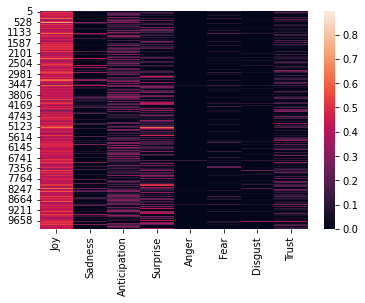

In [182]:
sns.heatmap(data = ser_test_data[ser_test_data["clusters"] == 0][["Joy", "Sadness", "Anticipation", "Surprise", "Anger", "Fear", "Disgust", "Trust"]])